https://www.kaggle.com/code/imthebaron/face-training?scriptVersionId=198879052

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob as gb
import pickle
import cv2
import pandas as pd
from tqdm import tqdm

In [2]:
data_path = '/kaggle/input/cvpr-faces/augmented_faces'

In [3]:
IMG_SIZE = 224
BATCH_SIZE = 64

100%|██████████| 56/56 [00:11<00:00,  4.79it/s]
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


39817


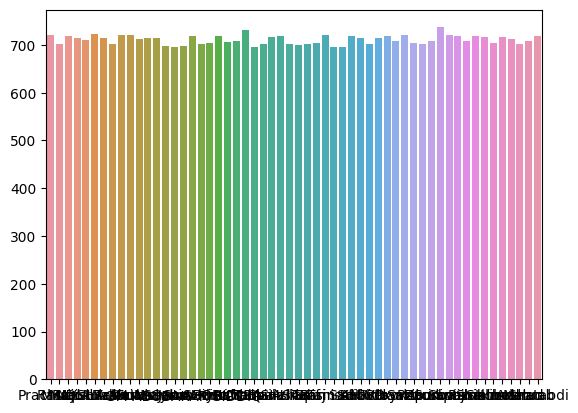

In [4]:
classes = []
class_count = []
train_examples = 0

for f in tqdm(os.listdir(data_path)):
  files = gb.glob(pathname = str(data_path + '//' + f + '//' + '/*'))
  classes.append(f)
  class_count.append(len(files))
  train_examples += len(files)

sns.barplot(x=classes, y=class_count)
print(train_examples)

In [5]:
train_gen = ImageDataGenerator(
      #rescale=1.0/255,
      #preprocessing_function = tf.keras.applications.vgg16.preprocess_input
      #preprocessing_function = tf.keras.applications.mobilenet.preprocess_input,
      preprocessing_function = tf.keras.applications.densenet.preprocess_input,
      validation_split = 0.3
)

In [6]:
train_batches = train_gen.flow_from_directory(
          directory = data_path,
          target_size = (IMG_SIZE, IMG_SIZE),
          class_mode='sparse',
          batch_size = BATCH_SIZE,
          shuffle=True,
          seed=42,
          subset = 'training'
      )

valid_batches = train_gen.flow_from_directory(
    directory = data_path,
    target_size = (IMG_SIZE, IMG_SIZE),
    class_mode='sparse',
    shuffle=True,
    seed=42,
    batch_size = BATCH_SIZE,
    subset = 'validation'
)

Found 27899 images belonging to 56 classes.
Found 11918 images belonging to 56 classes.


In [7]:
class_indices = train_batches.class_indices  # Dictionary mapping class names to integer labels

# Step 2: Invert the class_indices dictionary to get a mapping from labels to class names
class_names = {v: k for k, v in class_indices.items()}

# Output class names
print(class_names)

{0: 'ASHHAB', 1: 'Abir', 2: 'Afif', 3: 'Alvi', 4: 'Apurba', 5: 'Arnob', 6: 'Arshad', 7: 'Ashiq', 8: 'Avizit', 9: 'Dristi', 10: 'Farhan', 11: 'GM ABUBAKAR SIDDIQ', 12: 'Hasib', 13: 'Hasnatur', 14: 'Ishmam', 15: 'Jahin', 16: 'Khushbu', 17: 'Kowshik', 18: 'MAYSHA', 19: 'MRIDUL', 20: 'Maishara', 21: 'Mehrab', 22: 'Nipa Rahman', 23: 'Nishat', 24: 'Prachurjo', 25: 'Pranto', 26: 'Rafsan', 27: 'Ramisa', 28: 'Rassel', 29: 'Ridoy', 30: 'Rizon', 31: 'Rokon', 32: 'Rono', 33: 'SHOHIDUL', 34: 'SHUVO', 35: 'SUN', 36: 'Sadi', 37: 'Saif', 38: 'Sakib', 39: 'Sanim', 40: 'Sayem', 41: 'Shaila', 42: 'Shaivik', 43: 'Shakibul', 44: 'Shatabdi', 45: 'ShuvoSaha', 46: 'Siam', 47: 'Sintheia', 48: 'Sudipta', 49: 'Sumaiya', 50: 'Tahsin', 51: 'Tahsin Kabir', 52: 'Taj', 53: 'Talha', 54: 'Zarin', 55: 'ajmain'}


In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models

base_model = tf.keras.applications.DenseNet121(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

def custom():  # Change to 3 channels
    # Load Xception model with pre-trained weights (on ImageNet)
    input = layers.Input(shape=(224, 224, 3))
    
    x = base_model(input, training=True)

    # Add custom layers on top of the base model
    x = layers.GlobalAveragePooling2D()(x)  # Change to Global Average Pooling
    x = layers.Dropout(0.3)(x)  # Regularization
    x = layers.Dense(1024, activation='relu')(x)  # Dense layer  # Regularization
    x = layers.BatchNormalization()(x)
    x = layers.Dense(512, activation='relu')(x) 
    x = layers.Dropout(0.1)(x)
    
    output = x = layers.Dense(56, activation='softmax')(x) 

    # Create the model
    model = tf.keras.Model(inputs=input, outputs=output, name='bengali.ai')
    return model

# Create and compile the model
model = custom()
model.summary()

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "bengali.ai"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet121 (Functional)        │ (None, 7, 7, 1024)     │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 56)             │        28,728 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,644,728 (32.98 MB)

 Trainable params: 8,559,032 (32.65 MB)

 Non-trainable params: 85,696 (334.75 KB)

In [9]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',   # Metric to monitor (can be 'loss', 'accuracy', etc.)
    factor=0.9,           # Factor by which the learning rate will be reduced
    patience=20,           # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-6           # Lower bound on the learning rate
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation accuracy
    min_delta=0.001,         # Minimum change in monitored value to qualify as improvement
    patience=4,             # Stop after 10 epochs of no improvement
    mode='min',              # Maximize the validation accuracy
    restore_best_weights=True,  # Restore model weights from the best epoch
    verbose=1
)

In [10]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='checkpoint.weights.h5',
    monitor='val_loss',
    mode='min',
    save_freq = 'epoch',
    save_weights_only=True,
    save_best_only=True)

In [11]:
train_history = model.fit(
    train_batches,
    epochs = 50,
    steps_per_epoch = 20055 // BATCH_SIZE,
    validation_data = valid_batches,
    validation_steps = 8553 // BATCH_SIZE,
    callbacks=[model_checkpoint_callback, early_stopping_callback]#, reduce_lr]
)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1727682591.326304      79 service.cc:145] XLA service 0x7c1fe80045e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727682591.326360      79 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1727682696.398522      79 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 ━━━━━━━━━━━━━━━━━━━━ 479s 996ms/step - accuracy: 0.5879 - loss: 1.9231 - val_accuracy: 1.0000 - val_loss: 0.0071
Epoch 2/50
123/313 ━━━━━━━━━━━━━━━━━━━━ 1:04 338ms/step - accuracy: 1.0000 - loss: 0.0304

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


313/313 ━━━━━━━━━━━━━━━━━━━━ 68s 216ms/step - accuracy: 1.0000 - loss: 0.0266 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 150s 470ms/step - accuracy: 0.9998 - loss: 0.0135 - val_accuracy: 1.0000 - val_loss: 4.0419e-04
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 57s 181ms/step - accuracy: 1.0000 - loss: 0.0058 - val_accuracy: 1.0000 - val_loss: 2.8456e-04
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 143s 450ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 1.0000 - val_loss: 1.1747e-04
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 55s 175ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 1.0000 - val_loss: 8.9030e-05
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 142s 447ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 5.3463e-05
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 3.


In [12]:
model.save('face densenet121.h5')

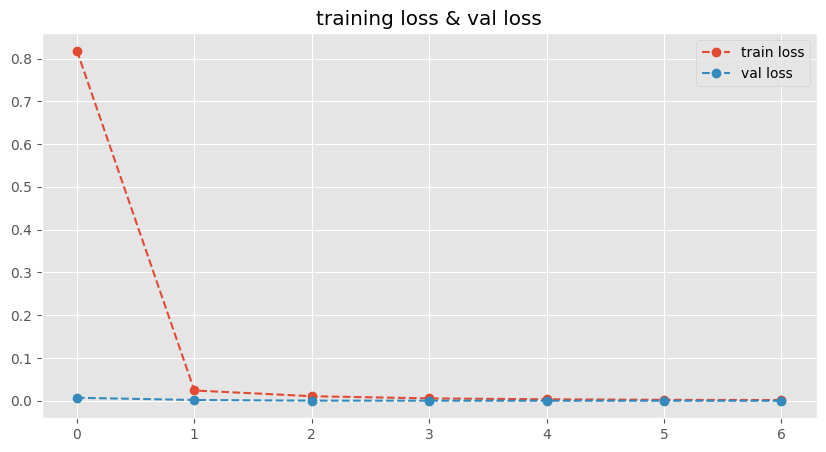

In [13]:
plt.style.use('ggplot')
plt.figure(figsize = (10, 5))
plt.plot(train_history.history['loss'], '--o', label='train loss')
plt.plot(train_history.history['val_loss'], '--o', label='val loss')
plt.legend()
plt.title('training loss & val loss')
plt.savefig('fig_total_loss.png', format='png', dpi=400)
plt.show()

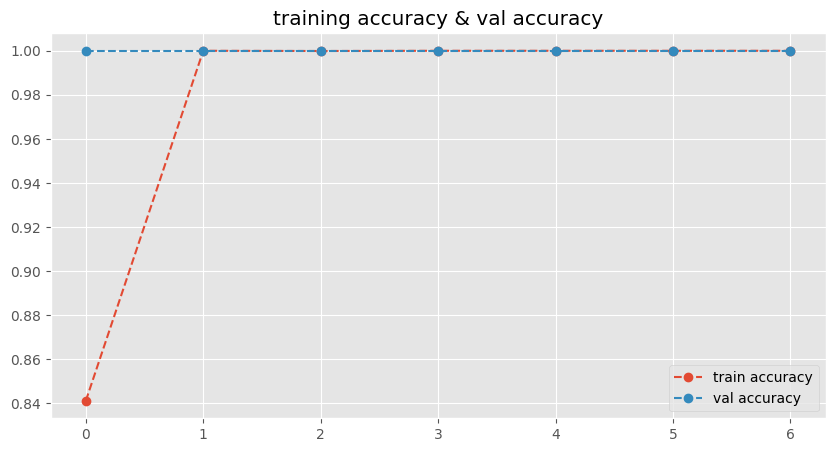

In [14]:
plt.style.use('ggplot')
plt.figure(figsize = (10, 5))
plt.plot(train_history.history['accuracy'], '--o', label='train accuracy')
plt.plot(train_history.history['val_accuracy'], '--o', label='val accuracy')
plt.legend()
plt.title('training accuracy & val accuracy')
plt.savefig('fig_total_acc.png', format='png', dpi=400)
plt.show()

In [15]:
pd.DataFrame(train_history.history).to_csv('history.csv', index=False)

In [16]:
df = pd.read_csv('/kaggle/working/history.csv')
print(df.shape) 
df.head(df.shape[0])

(7, 4)


,accuracy,loss,val_accuracy,val_loss
0,0.841214,0.818125,1.0,0.007089
1,1.000000,0.024156,1.0,0.001875
2,0.999900,0.010770,1.0,0.000404
3,1.000000,0.005607,1.0,0.000285
4,1.000000,0.003608,1.0,0.000117
5,1.000000,0.002274,1.0,0.000089
6,1.000000,0.001801,1.0,0.000053


In [17]:
# model = tf.keras.models.load_model('/kaggle/input/face-training/custom.h5')
# model.summary()

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
[32]
 Predicted label is:Rono


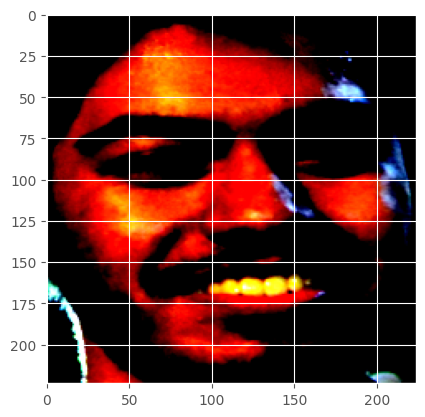

In [18]:
import numpy as np

img = tf.keras.utils.load_img('/kaggle/input/cvpr-faces/faces/Rono/4.png', target_size=(224, 224))
img_array = tf.keras.utils.img_to_array(img)
img = tf.keras.applications.densenet.preprocess_input(img_array)
img_array = tf.expand_dims(img_array, 0)

img_predictions = model.predict(img_array)
print([np.argmax(np.round(img_predictions,2))])
pred_label = class_names[np.argmax(np.round(img_predictions,2))]
print(" Predicted label is:"+ pred_label)

plt.imshow(img)